Project Name: Stock Portfolio Returns Analysis using Machine Learning and Optimisation Methods


TUM School of Management
Professor ...
Group Members:
1. Yen Vu Thi Ngoc
2. Rui Liu
3. Yesenia Marin Paniagua

# Table of Contents:
1. Introduction
2. Data Processing
3. Descriptive Analysis
4. Predictive Analysis
5. Prescriptive Analysis (Allocating Weights)
6. Rolling Portfolio
7. Performance Assessment
8. Conclusions
9. Limitations and Further Steps


#1. Introduction
The project is conducted in order to delve into the analytical methodologies applied to financial data, specifically focusing on a stock portfolio of US-based large-cap companies in the Information Technology sector from 2022 - 2023. With the use of machine learning models and time series models, the analysis also aim to discover the optimal models to predict portfolio´s future returns.

#2. Data Processing
* Import the necessary libraries
* Load the datasets into Pandas DataFrames
* Rename the data columns, remove uneccessary variables
* Convert 'date' column to datetime type, columns´s types into appropriate types
* Handling missing data

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
# Importing stock daily trading of portfolio from 2022-01-01 until 2023-12-31
daily_trading = pd.read_csv("Stock_Daily_Trading.csv", sep= ",")
daily_trading

,PERMNO,date,EXCHCD,TICKER,COMNAM,PERMCO,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,SHROUT,OPENPRC,NUMTRD,RETX,sprtrn
0,10107,2022-01-03,3,MSFT,MICROSOFT CORP,8048,NaN,329.78000,338.00000,334.75000,28823566,-0.004668,7507980,335.35001,397115.0,-0.004668,0.006374
1,10107,2022-01-04,3,MSFT,MICROSOFT CORP,8048,NaN,326.12000,335.20001,329.01001,32626156,-0.017147,7507980,334.82999,520038.0,-0.017147,-0.000630
2,10107,2022-01-05,3,MSFT,MICROSOFT CORP,8048,NaN,315.98001,326.07001,316.38000,39957778,-0.038388,7507980,325.85999,641921.0,-0.038388,-0.019393
3,10107,2022-01-06,3,MSFT,MICROSOFT CORP,8048,NaN,311.48999,318.70001,313.88000,39744069,-0.007902,7507980,313.14999,630065.0,-0.007902,-0.000964
4,10107,2022-01-07,3,MSFT,MICROSOFT CORP,8048,NaN,310.09000,316.50000,314.04001,32664078,0.000510,7507980,314.14999,501305.0,0.000510,-0.004050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,90319,2023-12-22,3,GOOGL,ALPHABET INC,45483,NaN,140.71001,141.99001,141.49001,26396854,0.007620,5918000,140.77000,295666.0,0.007620,0.001660
5006,90319,2023-12-26,3,GOOGL,ALPHABET INC,45483,NaN,141.19000,142.67999,141.52000,16684304,0.000212,5918000,141.59000,208470.0,0.000212,0.004232
5007,90319,2023-12-27,3,GOOGL,ALPHABET INC,45483,NaN,139.88600,142.08000,140.37000,19440225,-0.008126,5918000,141.59000,233363.0,-0.008126,0.001430
5008,90319,2023-12-28,3,GOOGL,ALPHABET INC,45483,NaN,139.75000,141.14000,140.23000,16023523,-0.000997,5918000,140.78000,199651.0,-0.000997,0.000370


In [4]:
daily_trading.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PERMNO   5010 non-null   int64  
 1   date     5010 non-null   object 
 2   EXCHCD   5010 non-null   int64  
 3   TICKER   5010 non-null   object 
 4   COMNAM   5010 non-null   object 
 5   PERMCO   5010 non-null   int64  
 6   DIVAMT   65 non-null     float64
 7   BIDLO    5010 non-null   float64
 8   ASKHI    5010 non-null   float64
 9   PRC      5010 non-null   float64
 10  VOL      5010 non-null   int64  
 11  RET      5010 non-null   float64
 12  SHROUT   5010 non-null   int64  
 13  OPENPRC  5010 non-null   float64
 14  NUMTRD   2004 non-null   float64
 15  RETX     5010 non-null   float64
 16  sprtrn   5010 non-null   float64
dtypes: float64(9), int64(5), object(3)
memory usage: 665.5+ KB


In [5]:
daily_trading.shape

(5010, 17)

In [6]:
# Importing financial ratios of 10 companies in the portfolio from 2022-01-01 until 2023-12-31
financial_ratios = pd.read_csv("Financial Ratios_Top 10 Profitable Companies_2y.csv", sep= ",")
financial_ratios

,gvkey,permno,adate,qdate,public_date,pe_exi,pe_inc,dpr,npm,gpm,roa,roe,debt_at,dltt_be,intcov_ratio,quick_ratio,curr_ratio,inv_turn,at_turn,TICKER
0,12141,10107,2021-06-30,2021-09-30,2022-01-31,34.785,34.785,0.249,0.385,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550,MSFT
1,12141,10107,2021-06-30,2021-12-31,2022-02-28,31.820,31.820,0.243,0.385,0.759,0.286,0.509,0.245,0.487,35.212,2.155,2.191,15.791,0.561,MSFT
2,12141,10107,2021-06-30,2021-12-31,2022-03-31,32.834,32.834,0.243,0.385,0.759,0.286,0.509,0.245,0.487,35.212,2.155,2.191,15.791,0.561,MSFT
3,12141,10107,2021-06-30,2021-12-31,2022-04-30,29.555,29.555,0.243,0.385,0.759,0.286,0.509,0.245,0.487,35.212,2.155,2.191,15.791,0.561,MSFT
4,12141,10107,2021-06-30,2022-03-31,2022-05-31,28.379,28.379,0.245,0.376,0.759,0.291,0.492,0.236,0.469,38.947,2.081,2.119,15.010,0.569,MSFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,160329,90319,2022-12-31,2023-06-30,2023-08-31,28.850,28.850,0.000,0.211,0.606,0.251,0.237,0.081,0.103,166.651,2.311,2.348,43.957,0.785,GOOGL
236,160329,90319,2022-12-31,2023-06-30,2023-09-30,27.725,27.725,0.000,0.211,0.606,0.251,0.237,0.081,0.103,166.651,2.311,2.348,43.957,0.785,GOOGL
237,160329,90319,2022-12-31,2023-06-30,2023-10-31,26.288,26.288,0.000,0.211,0.606,0.251,0.237,0.081,0.103,166.651,2.311,2.348,43.957,0.785,GOOGL
238,160329,90319,2022-12-31,2023-09-30,2023-11-30,25.438,25.438,0.000,0.225,0.604,0.254,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785,GOOGL


In [7]:
financial_ratios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gvkey         240 non-null    int64  
 1   permno        240 non-null    int64  
 2   adate         240 non-null    object 
 3   qdate         240 non-null    object 
 4   public_date   240 non-null    object 
 5   pe_exi        240 non-null    float64
 6   pe_inc        240 non-null    float64
 7   dpr           239 non-null    float64
 8   npm           240 non-null    float64
 9   gpm           240 non-null    float64
 10  roa           240 non-null    float64
 11  roe           240 non-null    float64
 12  debt_at       240 non-null    float64
 13  dltt_be       240 non-null    float64
 14  intcov_ratio  191 non-null    float64
 15  quick_ratio   192 non-null    float64
 16  curr_ratio    192 non-null    float64
 17  inv_turn      216 non-null    float64
 18  at_turn       240 non-null    

In [8]:
financial_ratios.shape

(240, 20)

In [9]:
# Rename "public_date" column from financial_ratios dataset into "date"
#financial_ratios = financial_ratios.rename(columns={"public_date": "date"})

In [10]:
# Sort both datasets by "date" then "company name"
daily_trading["column_to_merge"] = daily_trading['PERMNO'].astype(str) + '_' + daily_trading['date'].astype(str)
financial_ratios["column_to_merge"] = financial_ratios['permno'].astype(str) + '_' + financial_ratios['public_date'].astype(str)

daily_trading = daily_trading.sort_values([ "column_to_merge"])
financial_ratios = financial_ratios.sort_values([ "column_to_merge"])

financial_ratios

,gvkey,permno,adate,qdate,public_date,pe_exi,pe_inc,dpr,npm,gpm,...,roe,debt_at,dltt_be,intcov_ratio,quick_ratio,curr_ratio,inv_turn,at_turn,TICKER,column_to_merge
0,12141,10107,2021-06-30,2021-09-30,2022-01-31,34.785,34.785,0.249,0.385,0.758,...,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550,MSFT,10107_2022-01-31
1,12141,10107,2021-06-30,2021-12-31,2022-02-28,31.820,31.820,0.243,0.385,0.759,...,0.509,0.245,0.487,35.212,2.155,2.191,15.791,0.561,MSFT,10107_2022-02-28
2,12141,10107,2021-06-30,2021-12-31,2022-03-31,32.834,32.834,0.243,0.385,0.759,...,0.509,0.245,0.487,35.212,2.155,2.191,15.791,0.561,MSFT,10107_2022-03-31
3,12141,10107,2021-06-30,2021-12-31,2022-04-30,29.555,29.555,0.243,0.385,0.759,...,0.509,0.245,0.487,35.212,2.155,2.191,15.791,0.561,MSFT,10107_2022-04-30
4,12141,10107,2021-06-30,2022-03-31,2022-05-31,28.379,28.379,0.245,0.376,0.759,...,0.492,0.236,0.469,38.947,2.081,2.119,15.010,0.569,MSFT,10107_2022-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,160329,90319,2022-12-31,2023-06-30,2023-08-31,28.850,28.850,0.000,0.211,0.606,...,0.237,0.081,0.103,166.651,2.311,2.348,43.957,0.785,GOOGL,90319_2023-08-31
236,160329,90319,2022-12-31,2023-06-30,2023-09-30,27.725,27.725,0.000,0.211,0.606,...,0.237,0.081,0.103,166.651,2.311,2.348,43.957,0.785,GOOGL,90319_2023-09-30
237,160329,90319,2022-12-31,2023-06-30,2023-10-31,26.288,26.288,0.000,0.211,0.606,...,0.237,0.081,0.103,166.651,2.311,2.348,43.957,0.785,GOOGL,90319_2023-10-31
238,160329,90319,2022-12-31,2023-09-30,2023-11-30,25.438,25.438,0.000,0.225,0.604,...,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785,GOOGL,90319_2023-11-30


In [11]:
# Merge the two DataFrames using an outer join on "column to merge" column
merged_df = pd.merge(daily_trading, financial_ratios, on='column_to_merge', how='outer')
merged_df = merged_df.sort_values([ "column_to_merge"])
merged_df[["column_to_merge", "quick_ratio"]]


,column_to_merge,quick_ratio
0,10107_2022-01-03,NaN
1,10107_2022-01-04,NaN
2,10107_2022-01-05,NaN
3,10107_2022-01-06,NaN
4,10107_2022-01-07,NaN
...,...,...
5065,90319_2023-12-26,NaN
5066,90319_2023-12-27,NaN
5067,90319_2023-12-28,NaN
5068,90319_2023-12-29,NaN


In [12]:
# Check for missing values in the merged dataset
missing_values = merged_df.isnull().sum()
print(missing_values)

PERMNO               60
date                 60
EXCHCD               60
TICKER_x             60
COMNAM               60
PERMCO               60
DIVAMT             5005
BIDLO                60
ASKHI                60
PRC                  60
VOL                  60
RET                  60
SHROUT               60
OPENPRC              60
NUMTRD             3066
RETX                 60
sprtrn               60
column_to_merge       0
gvkey              4830
permno             4830
adate              4830
qdate              4830
public_date        4830
pe_exi             4830
pe_inc             4830
dpr                4831
npm                4830
gpm                4830
roa                4830
roe                4830
debt_at            4830
dltt_be            4830
intcov_ratio       4879
quick_ratio        4878
curr_ratio         4878
inv_turn           4854
at_turn            4830
TICKER_y           4830
dtype: int64


In [13]:
# Fill missing values using backward fill
columns_to_fill = [
    'pe_exi', 'pe_inc', 'dpr', 'npm', 'gpm', 'roa', 'roe', 'debt_at',
    'dltt_be', 'intcov_ratio', 'quick_ratio', 'curr_ratio', 'inv_turn', 'at_turn'
]

for column in columns_to_fill:
    merged_df[column] = merged_df[column].fillna(method='bfill')

#Fill financial_ratios manually with zero values for companies whose no records (META has no records in "inv_turn", JPM and BAC have no records in "intcov_ratio", "quick_ratio", "curr_ratio")
merged_df.loc[merged_df['PERMNO'] == 13407, 'inv_turn'] = 0
merged_df.loc[(merged_df['PERMNO'] == 47896) | (merged_df['PERMNO'] == 59408), ['intcov_ratio', 'quick_ratio', 'curr_ratio']] = 0

# Drop rows with missing values in specified columns due to non-trading days
columns_to_drop_na = ['PERMNO', 'EXCHCD', 'TICKER_x', 'COMNAM', 'PERMCO', 'BIDLO', 'ASKHI', 'PRC', 'VOL', 'RET', 'SHROUT', 'OPENPRC', 'RETX']
merged_df.dropna(subset=columns_to_drop_na, inplace=True)

merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5010 entries, 0 to 5068
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PERMNO           5010 non-null   float64
 1   date             5010 non-null   object 
 2   EXCHCD           5010 non-null   float64
 3   TICKER_x         5010 non-null   object 
 4   COMNAM           5010 non-null   object 
 5   PERMCO           5010 non-null   float64
 6   DIVAMT           65 non-null     float64
 7   BIDLO            5010 non-null   float64
 8   ASKHI            5010 non-null   float64
 9   PRC              5010 non-null   float64
 10  VOL              5010 non-null   float64
 11  RET              5010 non-null   float64
 12  SHROUT           5010 non-null   float64
 13  OPENPRC          5010 non-null   float64
 14  NUMTRD           2004 non-null   float64
 15  RETX             5010 non-null   float64
 16  sprtrn           5010 non-null   float64
 17  column_to_merge  50

In [14]:
# Fill missing values in 'DIVAMT' and 'NUMTRD' columns with 0
merged_df['DIVAMT'].fillna(0, inplace=True)
merged_df['NUMTRD'].fillna(0, inplace=True)

#Drop unnessary columns: gvkey, permno, adate, qdate, TICKER_y
merged_droped_df = merged_df.drop(['gvkey', 'permno', 'PERMCO','COMNAM', 'adate', 'qdate', 'public_date','TICKER_y', 'column_to_merge'], axis=1)

# Verify if missing values are dropped
print(merged_droped_df.isnull().sum())

PERMNO          0
date            0
EXCHCD          0
TICKER_x        0
DIVAMT          0
BIDLO           0
ASKHI           0
PRC             0
VOL             0
RET             0
SHROUT          0
OPENPRC         0
NUMTRD          0
RETX            0
sprtrn          0
pe_exi          0
pe_inc          0
dpr             0
npm             0
gpm             0
roa             0
roe             0
debt_at         0
dltt_be         0
intcov_ratio    0
quick_ratio     0
curr_ratio      0
inv_turn        0
at_turn         0
dtype: int64


In [15]:
# Check data types of all columns
print(merged_droped_df.dtypes)

#Convert into correct datatypes:
merged_droped_df['PERMNO'] = merged_droped_df['PERMNO'].astype(int)
merged_droped_df['date'] = pd.to_datetime(merged_droped_df['date'])

#Check duplicates


PERMNO          float64
date             object
EXCHCD          float64
TICKER_x         object
DIVAMT          float64
BIDLO           float64
ASKHI           float64
PRC             float64
VOL             float64
RET             float64
SHROUT          float64
OPENPRC         float64
NUMTRD          float64
RETX            float64
sprtrn          float64
pe_exi          float64
pe_inc          float64
dpr             float64
npm             float64
gpm             float64
roa             float64
roe             float64
debt_at         float64
dltt_be         float64
intcov_ratio    float64
quick_ratio     float64
curr_ratio      float64
inv_turn        float64
at_turn         float64
dtype: object


In [16]:
merged_droped_df.shape

(5010, 29)

In [17]:
#Convert clean dataframe into csv file
merged_droped_df.to_csv('Merged_dataset_clean.csv', index=False)


**Rui**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Load the merged and cleaned dataset into a Pandas Dataframe
stock = pd.read_csv('Merged_dataset_clean.csv', header=0)
stock.head()

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm,roa,roe,debt_at,dltt_be,intcov_ratio,quick_ratio,curr_ratio,inv_turn,at_turn
0,10107,2022-01-03,3.0,MSFT,0.0,329.78000,338.00000,334.75000,28823566.0,-0.004668,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.55
1,10107,2022-01-04,3.0,MSFT,0.0,326.12000,335.20001,329.01001,32626156.0,-0.017147,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.55
2,10107,2022-01-05,3.0,MSFT,0.0,315.98001,326.07001,316.38000,39957778.0,-0.038388,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.55
3,10107,2022-01-06,3.0,MSFT,0.0,311.48999,318.70001,313.88000,39744069.0,-0.007902,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.55
4,10107,2022-01-07,3.0,MSFT,0.0,310.09000,316.50000,314.04001,32664078.0,0.000510,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.55


In [3]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PERMNO        5010 non-null   int64  
 1   date          5010 non-null   object 
 2   EXCHCD        5010 non-null   float64
 3   TICKER_x      5010 non-null   object 
 4   DIVAMT        5010 non-null   float64
 5   BIDLO         5010 non-null   float64
 6   ASKHI         5010 non-null   float64
 7   PRC           5010 non-null   float64
 8   VOL           5010 non-null   float64
 9   RET           5010 non-null   float64
 10  SHROUT        5010 non-null   float64
 11  OPENPRC       5010 non-null   float64
 12  NUMTRD        5010 non-null   float64
 13  RETX          5010 non-null   float64
 14  sprtrn        5010 non-null   float64
 15  pe_exi        5010 non-null   float64
 16  pe_inc        5010 non-null   float64
 17  dpr           5010 non-null   float64
 18  npm           5010 non-null 

In [4]:
# Transform categorical variables

# Ensure 'date' is datetime
stock['date'] = pd.to_datetime(stock['date'])

# Store original index order
original_index = stock.index

# Transform PERMNO
(permnos, idx) = np.unique(stock['PERMNO'], return_index=True)
permnos = [po for (i,po) in sorted(list(zip(idx,permnos)))]

encode = OneHotEncoder(categories=[permnos], drop = 'first')
permno_encoded = encode.fit_transform(np.array(stock['PERMNO']).reshape(-1,1)).toarray()

for i, po in enumerate(permnos[1:], start=1):  # Skipping the first permno due to 'drop=first'
    stock[po] = permno_encoded[:, i-1]

# Sort the data by original index to restore original order
stock = stock.loc[original_index]

stock

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,at_turn,11850,13407,14541,14593,21936,47896,59408,65875,90319
0,10107,2022-01-03,3.0,MSFT,0.0,329.78000,338.00000,334.75000,28823566.0,-0.004668,...,0.550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10107,2022-01-04,3.0,MSFT,0.0,326.12000,335.20001,329.01001,32626156.0,-0.017147,...,0.550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10107,2022-01-05,3.0,MSFT,0.0,315.98001,326.07001,316.38000,39957778.0,-0.038388,...,0.550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10107,2022-01-06,3.0,MSFT,0.0,311.48999,318.70001,313.88000,39744069.0,-0.007902,...,0.550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10107,2022-01-07,3.0,MSFT,0.0,310.09000,316.50000,314.04001,32664078.0,0.000510,...,0.550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,90319,2023-12-22,3.0,GOOGL,0.0,140.71001,141.99001,141.49001,26396854.0,0.007620,...,0.785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5006,90319,2023-12-26,3.0,GOOGL,0.0,141.19000,142.67999,141.52000,16684304.0,0.000212,...,0.785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5007,90319,2023-12-27,3.0,GOOGL,0.0,139.88600,142.08000,140.37000,19440225.0,-0.008126,...,0.785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5008,90319,2023-12-28,3.0,GOOGL,0.0,139.75000,141.14000,140.23000,16023523.0,-0.000997,...,0.785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
# Transform Exchange Code(EXCHCD)

# Convert EXCHCD to integer data type
stock['EXCHCD'] = stock['EXCHCD'].astype(int)

(exchcds, idx) = np.unique(stock['EXCHCD'], return_index=True)
exchcds = sorted(exchcds)

encode = OneHotEncoder(categories=[exchcds], drop = 'first')
exchcd_encoded = encode.fit_transform(np.array(stock['EXCHCD']).reshape(-1,1)).toarray()

for i, cd in enumerate(exchcds[1:], start=1):  # Skipping the first exchcd due to 'drop=first'
    stock[cd] = exchcd_encoded[:, i-1]

# Sort the data by original index to restore original order
stock = stock.loc[original_index]

stock

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,11850,13407,14541,14593,21936,47896,59408,65875,90319,3
0,10107,2022-01-03,3,MSFT,0.0,329.78000,338.00000,334.75000,28823566.0,-0.004668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,10107,2022-01-04,3,MSFT,0.0,326.12000,335.20001,329.01001,32626156.0,-0.017147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,10107,2022-01-05,3,MSFT,0.0,315.98001,326.07001,316.38000,39957778.0,-0.038388,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10107,2022-01-06,3,MSFT,0.0,311.48999,318.70001,313.88000,39744069.0,-0.007902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,10107,2022-01-07,3,MSFT,0.0,310.09000,316.50000,314.04001,32664078.0,0.000510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,90319,2023-12-22,3,GOOGL,0.0,140.71001,141.99001,141.49001,26396854.0,0.007620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5006,90319,2023-12-26,3,GOOGL,0.0,141.19000,142.67999,141.52000,16684304.0,0.000212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5007,90319,2023-12-27,3,GOOGL,0.0,139.88600,142.08000,140.37000,19440225.0,-0.008126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5008,90319,2023-12-28,3,GOOGL,0.0,139.75000,141.14000,140.23000,16023523.0,-0.000997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [6]:
stock_lag1 = stock.copy()

In [7]:
vars = [ 'DIVAMT', 'BIDLO', 'ASKHI', 'PRC', 'VOL', 'SHROUT', 'OPENPRC', 'NUMTRD',
         'RETX', 'sprtrn',
    'pe_exi', 'pe_inc', 'dpr', 'npm', 'gpm', 'roa', 'roe', 'debt_at',
    'dltt_be', 'intcov_ratio', 'quick_ratio', 'curr_ratio', 'inv_turn', 'at_turn']

# Define lag period
lag_period = 21

# Function to create lagged features for a single stock's data
def create_lagged_features(group, lag_period, vars):
    for var in vars:
        group[f'{var}_lag{lag_period}'] = group[var].shift(lag_period)
    return group

# Apply the lagged feature creation function to each stock's data
stock_lag1 = stock_lag1.groupby('PERMNO').apply(create_lagged_features, lag_period=lag_period, vars=vars)
stock_lag1 = stock_lag1.reset_index(drop=True)

stock_lag1

C:\Users\admin\AppData\Local\Temp\ipykernel_25452\3592001974.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stock_lag1 = stock_lag1.groupby('PERMNO').apply(create_lagged_features, lag_period=lag_period, vars=vars)


,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm_lag21,roa_lag21,roe_lag21,debt_at_lag21,dltt_be_lag21,intcov_ratio_lag21,quick_ratio_lag21,curr_ratio_lag21,inv_turn_lag21,at_turn_lag21
0,10107,2022-01-03,3,MSFT,0.0,329.78000,338.00000,334.75000,28823566.0,-0.004668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10107,2022-01-04,3,MSFT,0.0,326.12000,335.20001,329.01001,32626156.0,-0.017147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10107,2022-01-05,3,MSFT,0.0,315.98001,326.07001,316.38000,39957778.0,-0.038388,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10107,2022-01-06,3,MSFT,0.0,311.48999,318.70001,313.88000,39744069.0,-0.007902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10107,2022-01-07,3,MSFT,0.0,310.09000,316.50000,314.04001,32664078.0,0.000510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,90319,2023-12-22,3,GOOGL,0.0,140.71001,141.99001,141.49001,26396854.0,0.007620,...,0.604,0.254,0.257,0.08,0.1,164.303,2.19,2.224,46.315,0.785
5006,90319,2023-12-26,3,GOOGL,0.0,141.19000,142.67999,141.52000,16684304.0,0.000212,...,0.604,0.254,0.257,0.08,0.1,164.303,2.19,2.224,46.315,0.785
5007,90319,2023-12-27,3,GOOGL,0.0,139.88600,142.08000,140.37000,19440225.0,-0.008126,...,0.604,0.254,0.257,0.08,0.1,164.303,2.19,2.224,46.315,0.785
5008,90319,2023-12-28,3,GOOGL,0.0,139.75000,141.14000,140.23000,16023523.0,-0.000997,...,0.604,0.254,0.257,0.08,0.1,164.303,2.19,2.224,46.315,0.785


In [8]:
# Drop rows with NaN values due to lagging
stock_lag1.dropna(inplace=True)
stock_lag1

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm_lag21,roa_lag21,roe_lag21,debt_at_lag21,dltt_be_lag21,intcov_ratio_lag21,quick_ratio_lag21,curr_ratio_lag21,inv_turn_lag21,at_turn_lag21
21,10107,2022-02-02,3,MSFT,0.0,308.88000,315.12000,313.45999,36566574.0,0.015222,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
22,10107,2022-02-03,3,MSFT,0.0,299.95999,311.23001,301.25000,43662713.0,-0.038952,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
23,10107,2022-02-04,3,MSFT,0.0,299.97000,308.79999,305.94000,35018097.0,0.015568,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
24,10107,2022-02-07,3,MSFT,0.0,299.89999,307.84000,300.95001,28476821.0,-0.016310,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
25,10107,2022-02-08,3,MSFT,0.0,299.95001,305.56100,304.56000,32375104.0,0.011995,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,90319,2023-12-22,3,GOOGL,0.0,140.71001,141.99001,141.49001,26396854.0,0.007620,...,0.604,0.254,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785
5006,90319,2023-12-26,3,GOOGL,0.0,141.19000,142.67999,141.52000,16684304.0,0.000212,...,0.604,0.254,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785
5007,90319,2023-12-27,3,GOOGL,0.0,139.88600,142.08000,140.37000,19440225.0,-0.008126,...,0.604,0.254,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785
5008,90319,2023-12-28,3,GOOGL,0.0,139.75000,141.14000,140.23000,16023523.0,-0.000997,...,0.604,0.254,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785


In [9]:
# standardize data
stand_cols = ['DIVAMT', 'BIDLO', 'ASKHI', 'PRC', 'VOL', 'SHROUT', 'OPENPRC', 'NUMTRD',
    'pe_exi', 'pe_inc', 'dpr', 'npm', 'gpm', 'roa', 'roe', 'debt_at',
    'dltt_be', 'intcov_ratio', 'quick_ratio', 'curr_ratio', 'inv_turn', 'at_turn',
    'DIVAMT_lag21', 'BIDLO_lag21', 'ASKHI_lag21', 'PRC_lag21', 'VOL_lag21', 'SHROUT_lag21',
    'OPENPRC_lag21', 'NUMTRD_lag21', 'pe_exi_lag21', 'pe_inc_lag21', 'dpr_lag21', 'npm_lag21',
    'gpm_lag21', 'roa_lag21', 'roe_lag21', 'debt_at_lag21', 'dltt_be_lag21', 'intcov_ratio_lag21',
    'quick_ratio_lag21', 'curr_ratio_lag21', 'inv_turn_lag21', 'at_turn_lag21']
x = stock_lag1[stand_cols].values  #returns a numpy array

standardize_scaler = StandardScaler().fit(x)
x_scaled = standardize_scaler.transform(x)

stock_lag1_scaled = stock_lag1.copy()

for i in range(len(stand_cols)):
    stock_lag1_scaled[stand_cols[i]] = x_scaled[:,i]

stock_lag1_scaled

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm_lag21,roa_lag21,roe_lag21,debt_at_lag21,dltt_be_lag21,intcov_ratio_lag21,quick_ratio_lag21,curr_ratio_lag21,inv_turn_lag21,at_turn_lag21
21,10107,2022-02-02,3,MSFT,-0.097961,0.347216,0.341165,0.348368,0.315441,0.015222,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
22,10107,2022-02-03,3,MSFT,-0.097961,0.322587,0.330736,0.315128,0.626288,-0.038952,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
23,10107,2022-02-04,3,MSFT,-0.097961,0.322614,0.324222,0.327896,0.247610,0.015568,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
24,10107,2022-02-07,3,MSFT,-0.097961,0.322421,0.321648,0.314312,-0.038931,-0.016310,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
25,10107,2022-02-08,3,MSFT,-0.097961,0.322559,0.315539,0.324139,0.131834,0.011995,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,90319,2023-12-22,3,GOOGL,-0.097961,-0.117128,-0.122962,-0.119787,-0.130044,0.007620,...,-0.035824,0.552203,-0.268602,-1.056722,-1.026113,0.014881,0.996126,0.937838,1.366077,0.570064
5006,90319,2023-12-26,3,GOOGL,-0.097961,-0.115803,-0.121113,-0.119706,-0.555503,0.000212,...,-0.035824,0.552203,-0.268602,-1.056722,-1.026113,0.014881,0.996126,0.937838,1.366077,0.570064
5007,90319,2023-12-27,3,GOOGL,-0.097961,-0.119403,-0.122721,-0.122836,-0.434780,-0.008126,...,-0.035824,0.552203,-0.268602,-1.056722,-1.026113,0.014881,0.996126,0.937838,1.366077,0.570064
5008,90319,2023-12-28,3,GOOGL,-0.097961,-0.119779,-0.125241,-0.123217,-0.584449,-0.000997,...,-0.035824,0.552203,-0.268602,-1.056722,-1.026113,0.014881,0.996126,0.937838,1.366077,0.570064


In [10]:
# Sort DataFrame by first by date and the by PERMNO
stock_lag1_scaled_sorted = stock_lag1_scaled.sort_values(by=['date', 'PERMNO'])
stock_lag1_scaled_sorted = stock_lag1_scaled_sorted.reset_index(drop=True)

stock_lag1_scaled_sorted

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm_lag21,roa_lag21,roe_lag21,debt_at_lag21,dltt_be_lag21,intcov_ratio_lag21,quick_ratio_lag21,curr_ratio_lag21,inv_turn_lag21,at_turn_lag21
0,10107,2022-02-02,3,MSFT,-0.097961,0.347216,0.341165,0.348368,0.315441,0.015222,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
1,11850,2022-02-02,1,XOM,-0.097961,-0.287105,-0.286974,-0.285494,0.040904,-0.002598,...,-2.270464,-1.528498,-0.958539,-0.134286,-0.740730,-0.363256,-0.728212,-0.504523,-0.323570,0.383551
2,13407,2022-02-02,3,FB,-0.097961,0.369291,0.375693,0.374338,1.272417,0.012539,...,1.132671,1.355281,-0.139687,-1.107499,-1.054299,4.065226,4.022241,3.948390,-0.892589,0.263034
3,14541,2022-02-02,1,CVX,-0.097961,-0.138969,-0.139557,-0.136339,-0.808591,0.004600,...,-1.575338,-0.679791,-0.717420,-0.210450,-0.712544,-0.311119,-0.283955,-0.146792,-0.052812,-0.081298
4,14593,2022-02-02,3,AAPL,-0.097961,-0.027059,-0.032110,-0.026276,2.430964,0.007044,...,-0.718157,1.437414,2.562765,1.558259,2.130714,-0.251997,-0.210601,-0.257023,0.972524,1.428027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,21936,2023-12-29,1,PFE,-0.097961,-0.426847,-0.426218,-0.426591,0.043697,0.000000,...,0.079319,-0.980945,-0.626701,0.348089,-0.360220,-0.328021,0.232623,0.414761,-0.766281,-0.732661
4796,47896,2023-12-29,1,JPM,-0.097961,-0.037275,-0.046023,-0.041902,-1.004471,-0.001174,...,0.121965,-1.537624,-0.428553,-0.337391,0.881724,-0.341290,-1.266487,-1.374931,-0.167221,-1.513148
4797,59408,2023-12-29,1,BAC,-0.097961,-0.413014,-0.412475,-0.413306,-0.057158,-0.006198,...,-0.082735,-1.610631,-0.588504,-0.083509,0.821829,-0.341290,-1.266487,-1.374931,-0.441148,-1.533235
4798,65875,2023-12-29,1,VZ,-0.097961,-0.402604,-0.402382,-0.402335,-0.575725,0.005601,...,-0.108322,-0.615910,-0.512110,2.184500,0.832398,-0.332007,-0.559808,-0.618913,0.320844,-0.672403


In [11]:
stock_lag1_scaled_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 63 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   PERMNO              4800 non-null   int64         
 1   date                4800 non-null   datetime64[ns]
 2   EXCHCD              4800 non-null   int32         
 3   TICKER_x            4800 non-null   object        
 4   DIVAMT              4800 non-null   float64       
 5   BIDLO               4800 non-null   float64       
 6   ASKHI               4800 non-null   float64       
 7   PRC                 4800 non-null   float64       
 8   VOL                 4800 non-null   float64       
 9   RET                 4800 non-null   float64       
 10  SHROUT              4800 non-null   float64       
 11  OPENPRC             4800 non-null   float64       
 12  NUMTRD              4800 non-null   float64       
 13  RETX                4800 non-null   float64     

In [12]:
# Select the first year data for model training and test

model_data = stock_lag1_scaled_sorted.iloc[:2300]
model_data.tail()  # Check the last 5 rows of data to make sure we made the split correctly

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm_lag21,roa_lag21,roe_lag21,debt_at_lag21,dltt_be_lag21,intcov_ratio_lag21,quick_ratio_lag21,curr_ratio_lag21,inv_turn_lag21,at_turn_lag21
2295,21936,2022-12-30,1,PFE,-0.097961,-0.365536,-0.365816,-0.365475,-0.787150,-0.001753,...,0.245638,0.360560,-0.001222,0.001118,-0.472964,-0.274553,0.000163,0.133985,-0.727901,-0.167382
2296,47896,2022-12-30,1,JPM,-0.097961,-0.139963,-0.143497,-0.139905,-0.879301,0.006606,...,1.111348,-1.583253,-0.535983,-0.464332,0.834160,-0.341290,-1.266487,-1.374931,-0.749700,-1.579146
2297,59408,2022-12-30,1,BAC,-0.097961,-0.414919,-0.414339,-0.414804,-0.051105,-0.000604,...,1.166787,-1.628882,-0.612377,-0.345854,0.867631,-0.341290,-1.266487,-1.374931,-0.836116,-1.587754
2298,65875,2022-12-30,1,VZ,-0.097961,-0.397772,-0.397208,-0.397708,0.641379,0.003566,...,-0.180820,-0.570280,-0.507335,2.319903,1.040270,-0.328710,-0.549476,-0.581477,-0.048765,-0.629361
2299,90319,2022-12-30,3,GOOGL,-0.097961,-0.266617,-0.266895,-0.264777,-0.237716,-0.002487,...,0.011086,0.643462,-0.254278,-1.056722,-1.020828,-0.010852,1.572627,1.514991,1.869748,0.581542


In [13]:
# Select the second year data for return prediction
predict_data = stock_lag1_scaled_sorted.iloc[2300:]
predict_data.head()  # Check the first 5 rows of data to make sure we made the split correctly

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm_lag21,roa_lag21,roe_lag21,debt_at_lag21,dltt_be_lag21,intcov_ratio_lag21,quick_ratio_lag21,curr_ratio_lag21,inv_turn_lag21,at_turn_lag21
2300,10107,2023-01-03,3,MSFT,-0.097961,0.149849,0.155198,0.147244,-0.159529,-0.001001,...,0.595334,0.835106,0.156341,0.153447,-0.437731,-0.249936,0.705809,0.654982,-0.206040,-0.029648
2301,11850,2023-01-03,1,XOM,-0.097961,-0.214376,-0.208668,-0.215014,-0.622882,-0.034361,...,-1.617983,0.296679,-0.225631,-0.591273,-0.821765,-0.180738,-0.389337,-0.165511,-0.239251,1.419418
2302,13407,2023-01-03,3,META,-0.097961,-0.168016,-0.164836,-0.165386,0.268327,0.036563,...,1.115612,0.625210,-0.340222,-0.836692,-0.964456,4.065226,1.581926,1.492113,-0.892589,0.314684
2303,14541,2023-01-03,1,CVX,-0.097961,-0.032084,-0.023746,-0.031312,-0.954957,-0.030642,...,-1.519898,0.205420,-0.368870,-0.777453,-0.916892,-0.195358,-0.097987,0.031033,0.222870,0.908658
2304,14593,2023-01-03,3,AAPL,-0.097961,-0.162797,-0.152692,-0.164488,3.617761,-0.037405,...,-0.671247,1.556050,3.307611,1.448243,2.611636,-0.252953,-0.391403,-0.460846,0.925463,1.534196


In [14]:
# Split the training and test dataset

# Define the target column
target_col = model_data['RET']

# Define the columns to exclude
exclude_cols = ['PERMNO', 'date', 'RET']

# Get the input columns by excluding the specified columns
input_cols = model_data.columns.difference(exclude_cols)

# Split the data into inputs (features) and target
X = model_data[input_cols]
y = model_data['RET']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (1840, 60) (1840,)
Testing set shape (X_test, y_test): (460, 60) (460,)


**Yen**

In [19]:
#This is a test code: 
test = 'abc'
print(test)

abc


**Yese**

In [27]:
df = pd.read_csv('Merged_dataset_clean.csv')
df_numeric = df.select_dtypes(include=['number'])

In [32]:
print(df_numeric.describe())

             PERMNO       EXCHCD       DIVAMT        BIDLO        ASKHI  \
count   5010.000000  5010.000000  5010.000000  5010.000000  5010.000000   
mean   34993.200000     1.800000     0.008863   192.110799   197.128276   
std    27211.244322     0.979894     0.089935   390.284300   401.922197   
min    10107.000000     1.000000     0.000000    24.960000    25.650000   
25%    13407.000000     1.000000     0.000000    49.096250    50.238750   
50%    18264.500000     1.000000     0.000000   127.905000   130.939995   
75%    59408.000000     3.000000     0.000000   169.967497   173.569997   
max    90319.000000     3.000000     1.510000  2910.450200  3030.931400   

               PRC           VOL          RET        SHROUT      OPENPRC  ...  \
count  5010.000000  5.010000e+03  5010.000000  5.010000e+03  5010.000000  ...   
mean    194.606800  2.966068e+07     0.000243  5.688157e+06   194.634313  ...   
std     395.789390  2.323226e+07     0.020251  3.987290e+06   396.476088  ...   


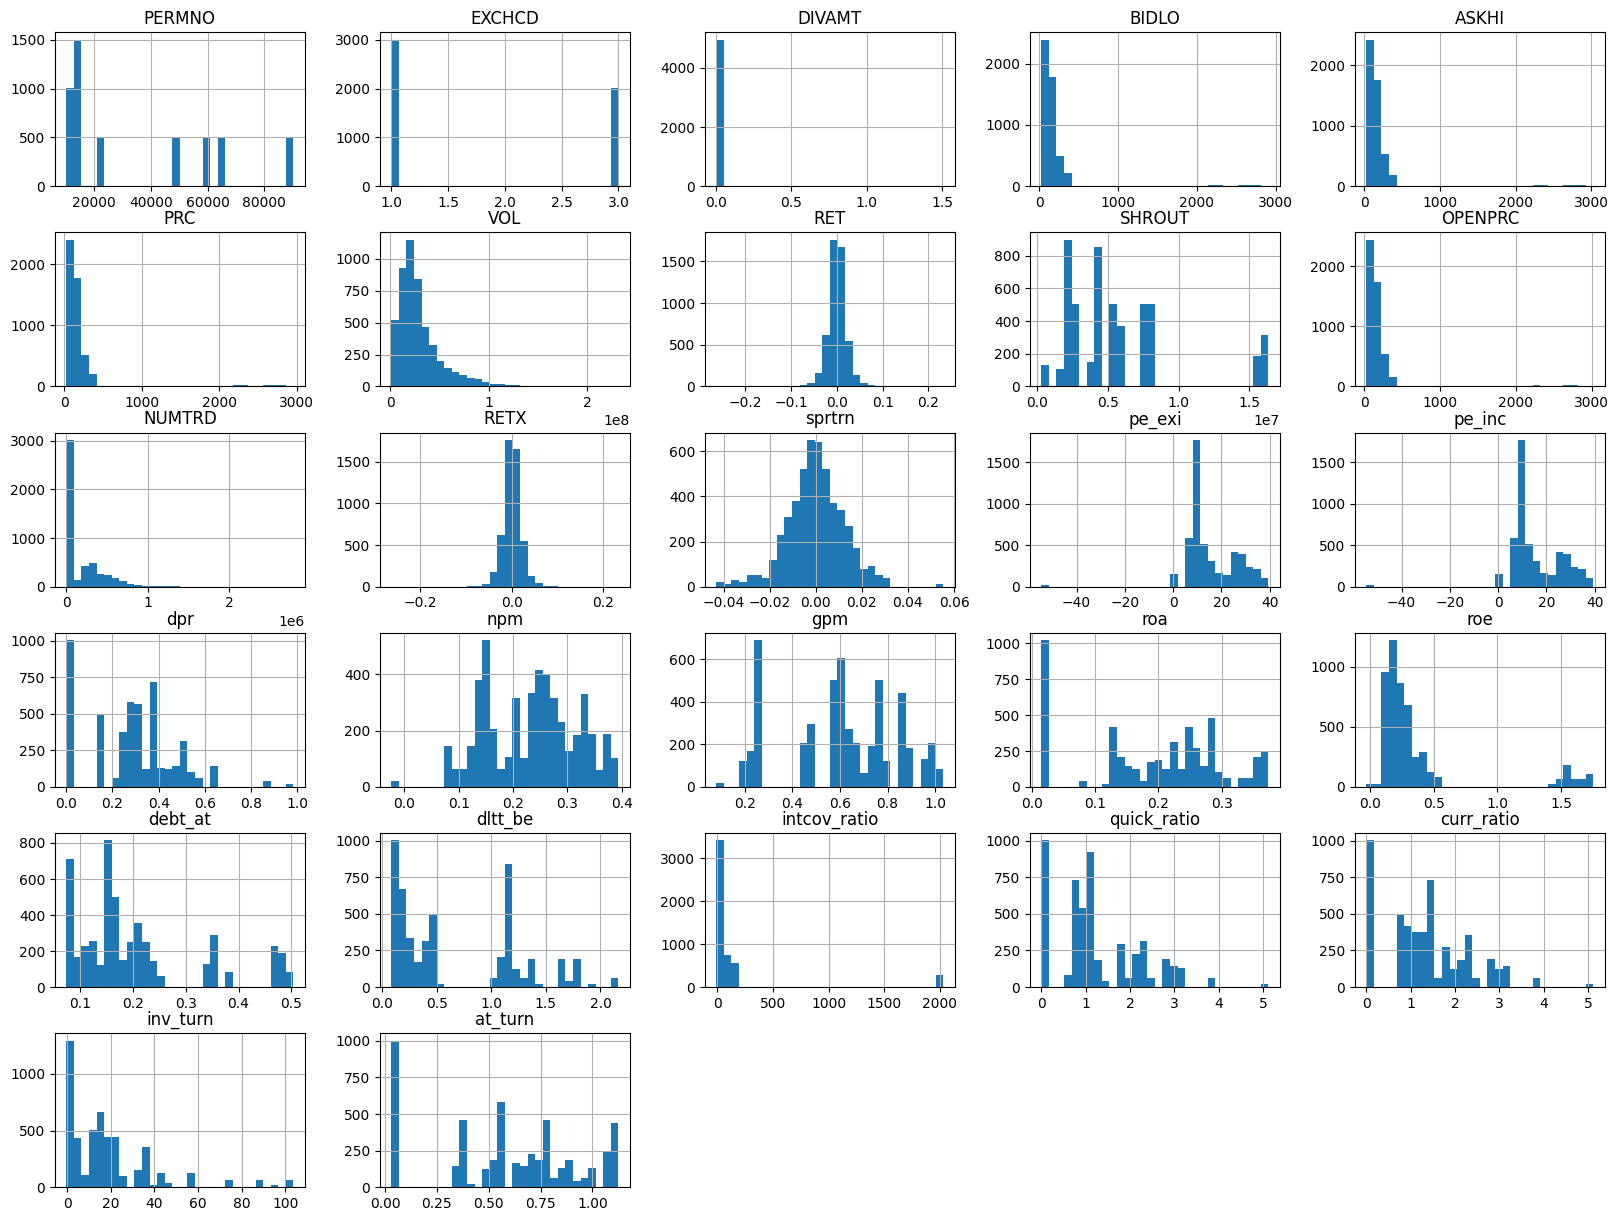

In [33]:
df_numeric.hist(bins=30, figsize=(20, 15))
plt.show()

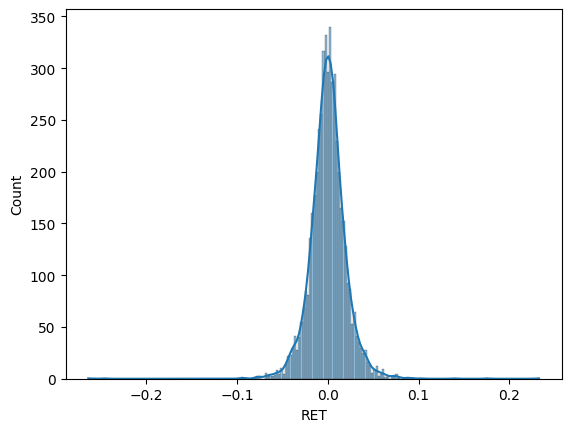

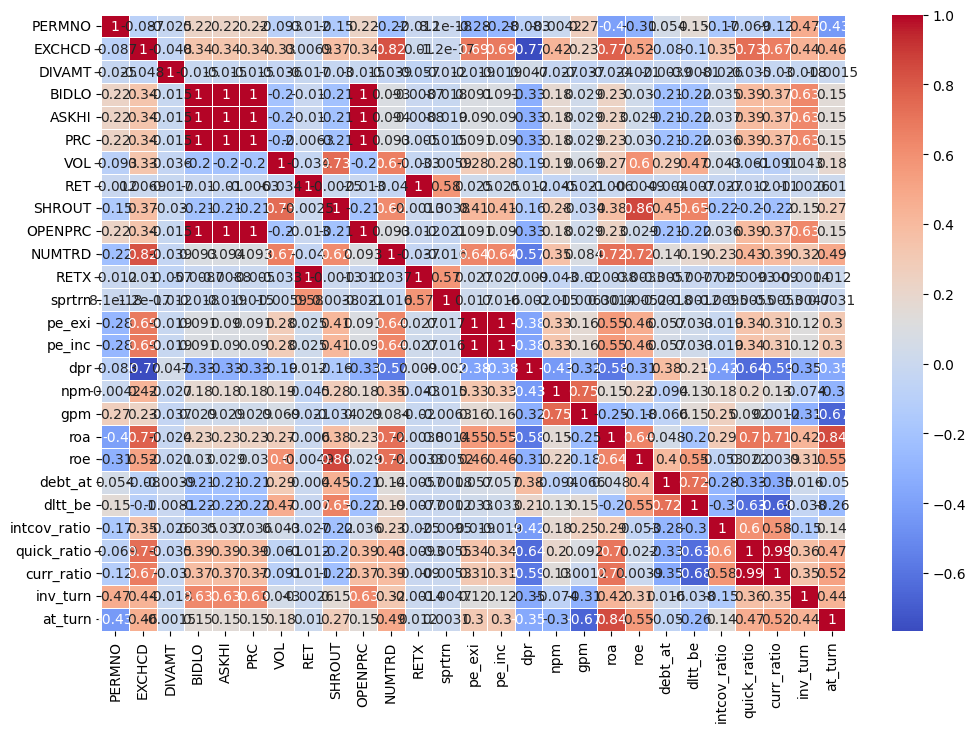

In [36]:
sns.histplot(df_numeric['RET'], kde=True)
plt.show()

corr_matrix = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

        count      mean       std       min       25%       50%       75%  \
PERMNO                                                                      
10107   501.0  0.000446  0.019337 -0.077156 -0.010974  0.000405  0.012272   
11850   501.0  0.001310  0.019250 -0.078853 -0.010143  0.001629  0.012808   
13407   501.0  0.000691  0.033896 -0.263901 -0.013124  0.000648  0.015643   
14541   501.0  0.000788  0.017957 -0.067205 -0.008611  0.001121  0.010787   
14593   501.0  0.000351  0.018331 -0.058680 -0.009618  0.000628  0.010139   
21936   501.0 -0.001155  0.015784 -0.067180 -0.011179 -0.001203  0.008086   
47896   501.0  0.000395  0.016207 -0.061463 -0.008527  0.001016  0.008954   
59408   501.0 -0.000274  0.018768 -0.063736 -0.011224 -0.001459  0.008974   
65875   501.0 -0.000288  0.014361 -0.074978 -0.007187  0.000261  0.007134   
90319   501.0  0.000168  0.021951 -0.095094 -0.012997 -0.000084  0.012629   

             max  
PERMNO            
10107   0.082268  
11850   0.064113  

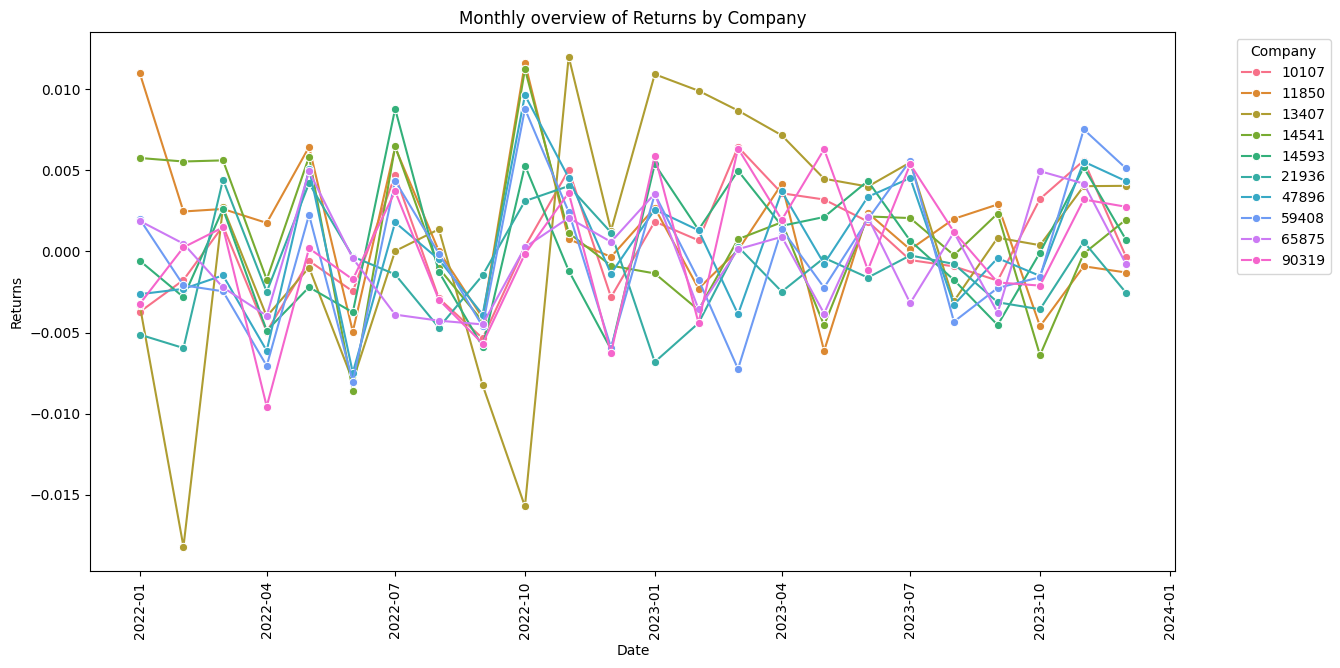

In [42]:
df['date'] = pd.to_datetime(df['date'])

df['RET'] = pd.to_numeric(df['RET'], errors='coerce')

df['Month'] = df['date'].dt.to_period('M').dt.to_timestamp()
df_monthly = df.groupby(['Month', 'PERMNO'])['RET'].mean().reset_index()

summary_stats = df.groupby('PERMNO')['RET'].describe()
print(summary_stats)

plt.figure(figsize=(14, 7))
palette = sns.color_palette("husl", len(df['PERMNO'].unique()))

sns.lineplot(data=df_monthly, x='Month', y='RET', hue='PERMNO', palette=palette, marker='o')

plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Monthly overview of Returns by Company')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()